<a href="https://colab.research.google.com/github/paulzl/Assignment_session03_paulzl/blob/main/Copy_of_Session02_Query_GeoData_Melbourne_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mapping APIs

https://www.openstreetmap.org/#map=16/41.3893/2.1725

https://developers.google.com/maps/documentation/maps-static/overview

https://developers.google.com/maps/documentation/streetview/request-streetview

https://docs.mapbox.com/api/overview/

RETRIEVING GEOSPATIAL DATA FROM OSM API
https://www.openstreetmap.org/

Welcome to OpenStreetMap!
OpenStreetMap is a map of the world, created by people like you and free to use under an open licence.

Libraries to be used today:
OSMmx:https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.speed
Matplotlib:https://matplotlib.org/3.5.1/tutorials/introductory/usage.html


OSMnx is a Python package that lets you download geospatial data from OpenStreetMap and model, project, visualize, and analyze real-world street networks and any other geospatial geometries. You can download and model walkable, drivable, or bikeable urban networks with a single line of Python code then easily analyze and visualize them. You can just as easily download and work with other infrastructure types, amenities/points of interest, building footprints, elevation data, street bearings/orientations, and speed/travel time.

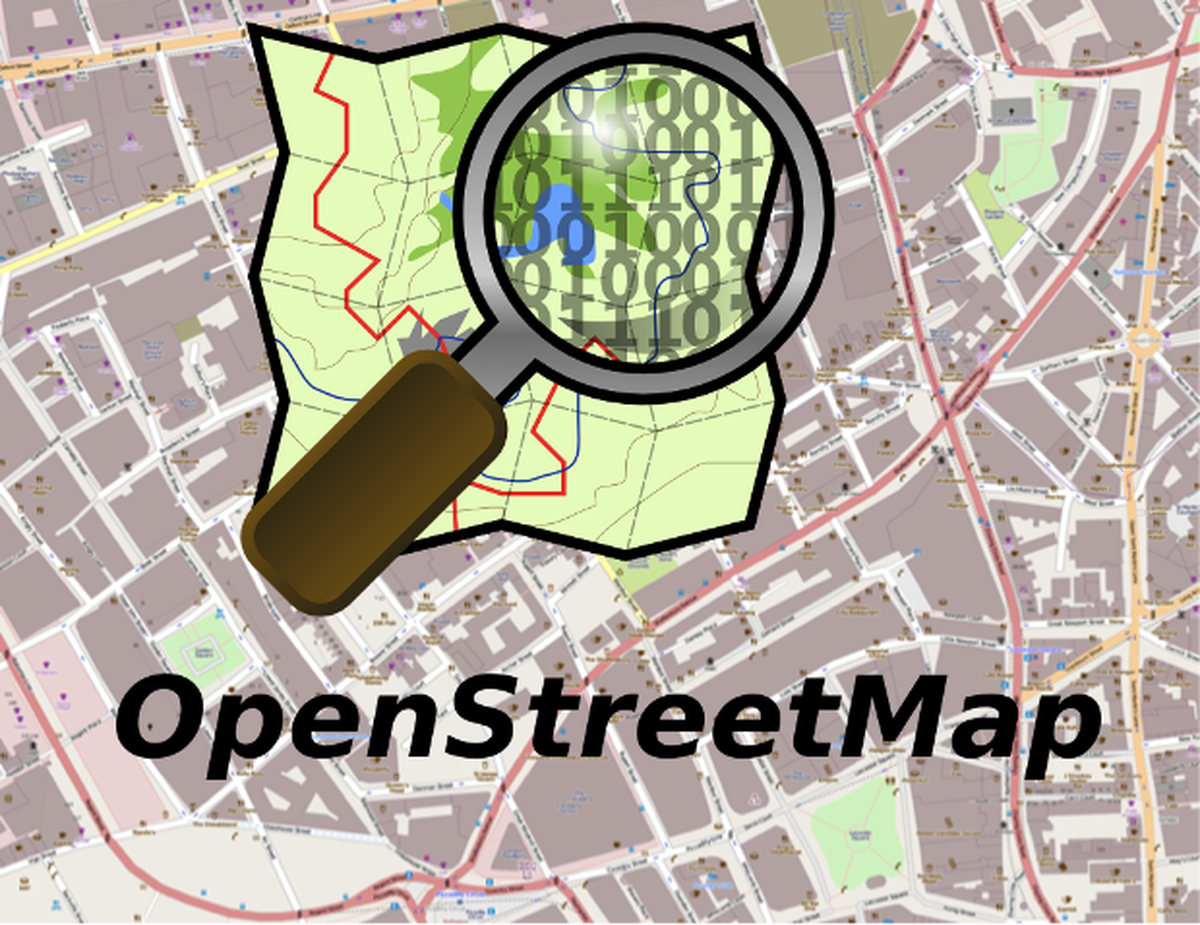

In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl                  0.12.11
cached-property               1.5.2
cachetools                    5.3.0
cata

In [2]:
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [3]:
#install osmnx library
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1


In [5]:
#importing OSM/matplotlib
import osmnx as ox
import matplotlib.pyplot as plt

**LOCATION, LAT-LONG POINT**

41.38924, 2.17257

In [6]:
#identifying lat-long point
point = (-37.814, 144.96332)

**STREET NETWORK**

In [7]:
#retreiving graph from that point in a range of 250 m
graph = ox.graph_from_point(point, dist=1000)
graph

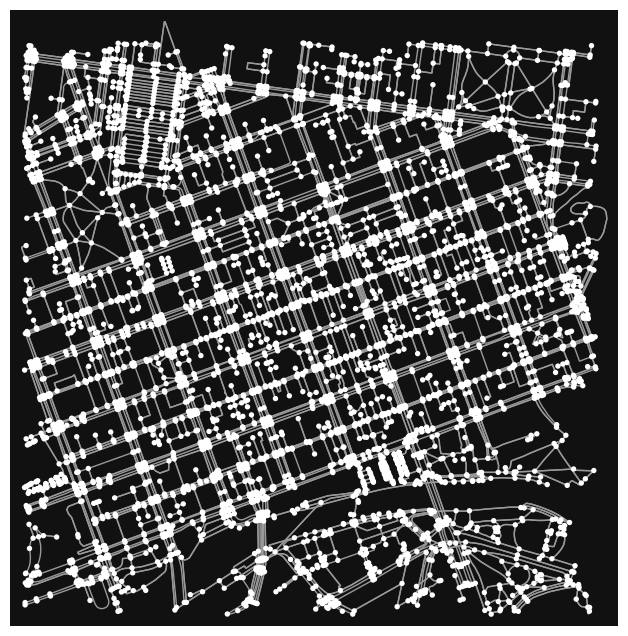

In [8]:
#using osmnx library to plot the graph(matplotlib)
fig, ax = ox.plot_graph(graph)

In [9]:
#retrive nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [10]:
#checking nodes dataframe
nodes.head()

y           x  street_count          highway  ref  \
osmid                                                                 
26034526 -37.814398  144.954709             4              NaN  NaN   
26034533 -37.813953  144.960317             4  traffic_signals  NaN   
26034534 -37.814661  144.957857             4  traffic_signals  NaN   
26034544 -37.816641  144.958721             4              NaN  NaN   
26034627 -37.807247  144.953439             4              NaN  NaN   

                             geometry  
osmid                                  
26034526  POINT (144.95471 -37.81440)  
26034533  POINT (144.96032 -37.81395)  
26034534  POINT (144.95786 -37.81466)  
26034544  POINT (144.95872 -37.81664)  
26034627  POINT (144.95344 -37.80725)

In [11]:
#checking edges dataframe
edges.head()

osmid  oneway lanes  ref                  name  \
u        v          key                                                        
26034526 6167236637 0     581959665    True     3  A60           King Street   
         259616706  0     581959662    True     2  NaN       Lonsdale Street   
26034533 2020813831 0     715211394    True   NaN  NaN  Little Bourke Street   
         6167489454 0    1126800685    True   NaN  NaN          Queen Street   
26034534 6722694957 0     968328218    True   NaN  NaN        William Street   

                               highway maxspeed reversed  length  \
u        v          key                                            
26034526 6167236637 0            trunk       40    False   6.837   
         259616706  0         tertiary       40    False  13.146   
26034533 2020813831 0    living_street       20    False  13.743   
         6167489454 0         tertiary       40    False   5.828   
26034534 6722694957 0         tertiary       40    False   5.463   

                                                                  geometry  \
u        v          key                                                      
26034526 6167236637 0    LINESTRING (144.95471 -37.81440, 144.95468 -37...   
         259616706  0    LINESTRING (144.95471 -37.81440, 144.95478 -37...   
26034533 2020813831 0    LINESTRING (144.96032 -37.81395, 144.96017 -37...   
         6167489454 0    LINESTRING (144.96032 -37.81395, 144.96034 -37...   
26034534 6722694957 0    LINESTRING (144.95786 -37.81466, 144.95788 -37...   

                        junction service bridge width tunnel access  
u        v          key                                              
26034526 6167236637 0        NaN     NaN    NaN   NaN    NaN    NaN  
         259616706  0        NaN     NaN    NaN   NaN    NaN    NaN  
26034533 2020813831 0        NaN     NaN    NaN   NaN    NaN    NaN  
         6167489454 0        NaN     NaN    NaN   NaN    NaN    NaN  
26034534 6722694957 0        NaN     NaN    NaN   NaN    NaN    NaN

In [12]:
#plotting the whole edges dataframe
edges

osmid  oneway lanes  ref  \
u           v           key                                                
26034526    6167236637  0                   581959665    True     3  A60   
            259616706   0                   581959662    True     2  NaN   
26034533    2020813831  0                   715211394    True   NaN  NaN   
            6167489454  0                  1126800685    True   NaN  NaN   
26034534    6722694957  0                   968328218    True   NaN  NaN   
...                                               ...     ...   ...  ...   
10846033634 1964021891  0    [1166108781, 1166108782]   False   NaN  NaN   
10846033635 10846033634 0                  1166108780   False   NaN  NaN   
10846033636 5856691446  0                   185737823   False   NaN  NaN   
            7397051066  0                   185737823   False   NaN  NaN   
            10846033625 0    [1166108785, 1166108774]   False   NaN  NaN   

                                             name        highway maxspeed  \
u           v           key                                                 
26034526    6167236637  0             King Street          trunk       40   
            259616706   0         Lonsdale Street       tertiary       40   
26034533    2020813831  0    Little Bourke Street  living_street       20   
            6167489454  0            Queen Street       tertiary       40   
26034534    6722694957  0          William Street       tertiary       40   
...                                           ...            ...      ...   
10846033634 1964021891  0                     NaN        footway      NaN   
10846033635 10846033634 0                     NaN        footway      NaN   
10846033636 5856691446  0                     NaN        footway      NaN   
            7397051066  0                     NaN        footway      NaN   
            10846033625 0                     NaN        footway      NaN   

                                  reversed  length  \
u           v           key                          
26034526    6167236637  0            False   6.837   
            259616706   0            False  13.146   
26034533    2020813831  0            False  13.743   
            6167489454  0            False   5.828   
26034534    6722694957  0            False   5.463   
...                                    ...     ...   
10846033634 1964021891  0    [False, True]  11.696   
10846033635 10846033634 0            False   4.540   
10846033636 5856691446  0            False   1.753   
            7397051066  0             True  13.377   
            10846033625 0    [False, True]  12.126   

                                                                      geometry  \
u           v           key                                                      
26034526    6167236637  0    LINESTRING (144.95471 -37.81440, 144.95468 -37...   
            259616706   0    LINESTRING (144.95471 -37.81440, 144.95478 -37...   
26034533    2020813831  0    LINESTRING (144.96032 -37.81395, 144.96017 -37...   
            6167489454  0    LINESTRING (144.96032 -37.81395, 144.96034 -37...   
26034534    6722694957  0    LINESTRING (144.95786 -37.81466, 144.95788 -37...   
...                                                                        ...   
10846033634 1964021891  0    LINESTRING (144.96716 -37.81851, 144.96722 -37...   
10846033635 10846033634 0    LINESTRING (144.96714 -37.81848, 144.96716 -37...   
10846033636 5856691446  0    LINESTRING (144.96693 -37.81807, 144.96692 -37...   
            7397051066  0    LINESTRING (144.96693 -37.81807, 144.96699 -37...   
            10846033625 0    LINESTRING (144.96693 -37.81807, 144.96700 -37...   

                            junction service bridge width tunnel access  
u           v           key                                              
26034526    6167236637  0        NaN     NaN    NaN   NaN    NaN    NaN  
            259616706   0        NaN     NaN    NaN   NaN    NaN 

In [ ]:
#checking edges shape
edges.shape

(2811, 14)

<AxesSubplot:>

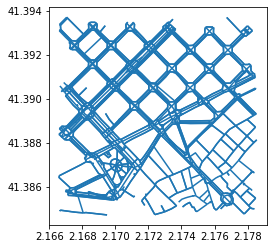

In [ ]:
#plotting network edges
edges.plot()

**BUILDINGS**

In [ ]:
# tags dictionary, key-value
tags = { 'building': 'apartments' }

you can check other values of building from here:
https://wiki.openstreetmap.org/wiki/Buildings

In [ ]:
#retrieving buildings from the same location
buildings = ox.geometries_from_point(point, tags, dist=500)

<Axes: >

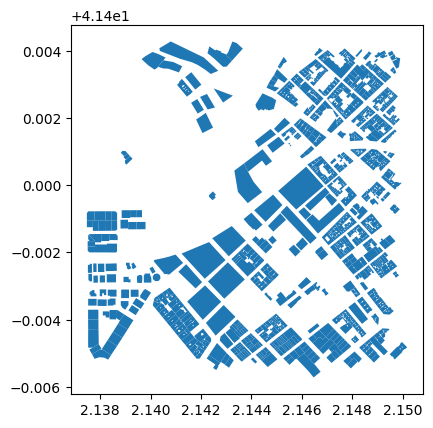

In [ ]:
buildings.plot()

In [ ]:
buildings.crs

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
buildings['area']= buildings.area

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-23-cf1d99b08844>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buildings['area']= buildings.area


In [ ]:
buildings['area']

element_type  osmid    
way           224518742    4.609848e-08
              249401956    1.095172e-07
              249401973    8.512839e-08
              249402013    2.386469e-08
              249402115    2.593049e-08
                               ...     
relation      13153469     3.424883e-08
              13337963     3.704386e-08
              13338163     3.421346e-08
              13338176     3.121113e-08
              14694197     2.553962e-08
Name: area, Length: 734, dtype: float64

In [ ]:
#changing the current projection system using .to_crs(epsg=32631)
buildings_proj = buildings.to_crs(epsg=32631)

In [ ]:
buildings_proj['area'] = buildings_proj.area

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
buildings_proj['area']

element_type  osmid    
way           224518742     427.846067
              249401956    1016.525858
              249401973     790.158231
              249402013     221.508880
              249402115     240.684237
                              ...     
relation      13153469      317.886052
              13337963      343.834500
              13338163      317.564679
              13338176      289.697949
              14694197      237.049997
Name: area, Length: 734, dtype: float64

In [ ]:
buildings_proj.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#checking how many buildings did we get
len(buildings)

1517

In [ ]:
#checking buildings dataframe
buildings.head()

addr:housenumber addr:postcode  \
element_type osmid                                       
node         4461103271              122         08009   
             6360697291               11           NaN   
way          31957078                 16         08003   
             123452777               NaN           NaN   
             126325039                73         08010   

                                        addr:street  \
element_type osmid                                    
node         4461103271        Carrer de Pau Claris   
             6360697291        Carrer de Fontanella   
way          31957078    Avinguda de Francesc Cambó   
             123452777                          NaN   
             126325039         Carrer de Pau Claris   

                                                name shop  \
element_type osmid                                          
node         4461103271  Renaissance Barcelona Hotel  NaN   
             6360697291      Residència d'Estudiants  NaN   
way          31957078       Mercat de Santa Caterina  NaN   
             123452777                           NaN  NaN   
             126325039                           NaN  NaN   

                                                                  geometry  \
element_type osmid                                                           
node         4461103271                           POINT (2.16749 41.39272)   
             6360697291                           POINT (2.17212 41.38792)   
way          31957078    POLYGON ((2.17871 41.38574, 2.17864 41.38567, ...   
             123452777   POLYGON ((2.16742 41.38553, 2.16742 41.38556, ...   
             126325039   POLYGON ((2.17166 41.38909, 2.17168 41.38911, ...   

                         addr:city entrance addr:country        brand  ...  \
element_type osmid                                                     ...   
node         4461103271  Barcelona      NaN          NaN  Renaissance  ...   
             6360697291        NaN      NaN          NaN          NaN  ...   
way          31957078    Barcelona      NaN          NaN          NaN  ...   
             123452777         NaN      NaN          NaN          NaN  ...   
             126325039         NaN      NaN          NaN          NaN  ...   

                        architect:wikipedia man_made addr:housename  \
element_type osmid                                                    
node         4461103271                 NaN      NaN            NaN   
             6360697291                 NaN      NaN            NaN   
way          31957078                   NaN      NaN            NaN   
             123452777                  NaN      NaN            NaN   
             126325039                  NaN      NaN            NaN   

                        abandoned:building start_date name:ru  \
element_type osmid                                              
node         4461103271                NaN        NaN     NaN   
             6360697291                NaN        NaN     NaN   
way          31957078                  NaN        NaN     NaN   
             123452777                 NaN        NaN     NaN   
             126325039                 NaN        NaN     NaN   

                        disused:building ways type alt_name  
element_type osmid                                           
node         4461103271              NaN  NaN  NaN      NaN  
             6360697291              NaN  NaN  NaN      NaN  
way          31957078                NaN  NaN  NaN      NaN  
             123452777               NaN  NaN  NaN      NaN  
             126325039               NaN  NaN  NaN      NaN  

[5 rows x 65 columns]

In [ ]:
#checking data shape, how many rows and columns
buildings.shape

(1517, 65)

In [ ]:
#buildings columns
buildings.columns

Index(['addr:housenumber', 'addr:postcode', 'addr:street', 'name', 'shop',
       'geometry', 'addr:city', 'entrance', 'addr:country', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'building', 'building:levels',
       'height', 'operator', 'phone', 'tourism', 'website', 'email',
       'internet_access', 'stars', 'contact:email', 'contact:phone',
       'contact:website', 'opening_hours', 'amenity', 'wheelchair', 'nodes',
       'architect', 'building:levels:underground', 'name:ca', 'name:es',
       'name:zh', 'wikidata', 'wikipedia', 'artist_name', 'artwork_type',
       'historic', 'inscription', 'name:en', 'name:fr', 'description',
       'source', 'government', 'office', 'roof:shape', 'smoking',
       'denomination', 'fax', 'religion', 'roof:levels', 'rooms', 'cuisine',
       'architect:wikidata', 'architect:wikipedia', 'man_made',
       'addr:housename', 'abandoned:building', 'start_date', 'name:ru',
       'disused:building', 'ways', 'type', 'alt_name'],
      dtype='

<AxesSubplot:>

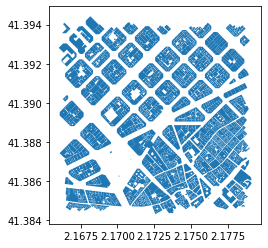

In [ ]:
#plotting buildings
buildings.plot()

<AxesSubplot:>

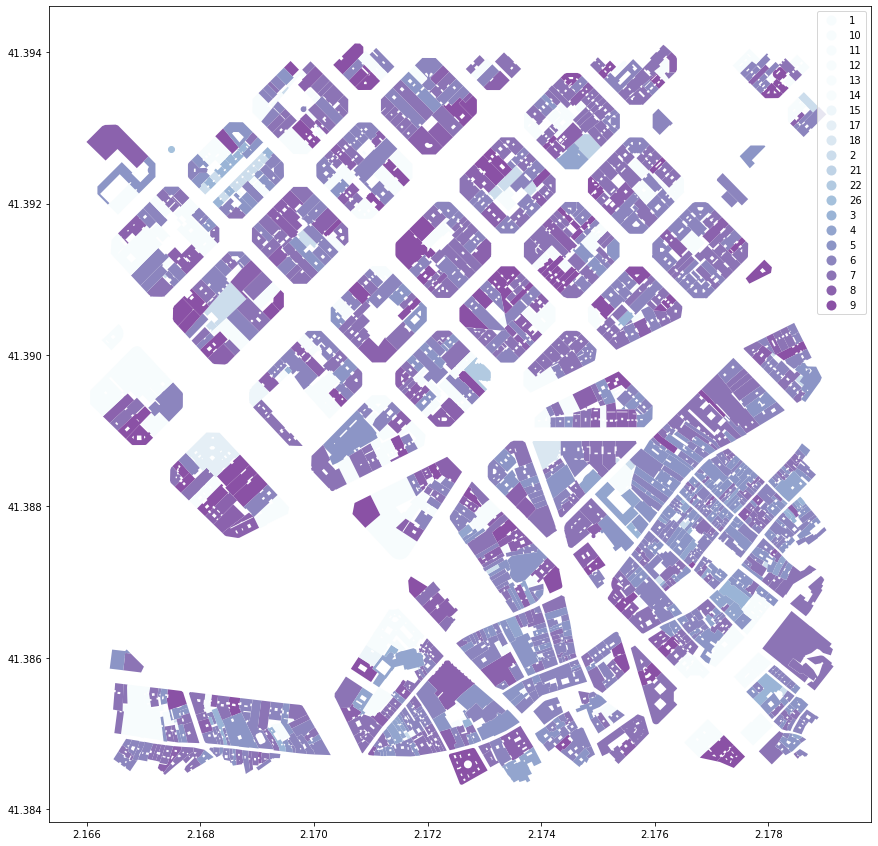

In [ ]:
#matplotlib plotting, color buildings based on levels
fig, ax = plt.subplots(figsize = (30,15))

buildings.plot(column='building:levels', ax=ax, 
legend=True,
vmin = 5,
vmax = 25,
cmap='BuPu',
)


In [ ]:
#add buildings area as another dataframe column
buildings['area'] = buildings.area

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [ ]:
#checking thew dataframe columns
buildings.columns

Index(['addr:housenumber', 'addr:postcode', 'addr:street', 'name', 'shop',
       'geometry', 'addr:city', 'entrance', 'addr:country', 'brand',
       'brand:wikidata', 'brand:wikipedia', 'building', 'building:levels',
       'height', 'operator', 'phone', 'tourism', 'website', 'email',
       'internet_access', 'stars', 'contact:email', 'contact:phone',
       'contact:website', 'opening_hours', 'amenity', 'wheelchair', 'nodes',
       'architect', 'building:levels:underground', 'name:ca', 'name:es',
       'name:zh', 'wikidata', 'wikipedia', 'artist_name', 'artwork_type',
       'historic', 'inscription', 'name:en', 'name:fr', 'description',
       'source', 'government', 'office', 'roof:shape', 'smoking',
       'denomination', 'fax', 'religion', 'roof:levels', 'rooms', 'cuisine',
       'architect:wikidata', 'architect:wikipedia', 'man_made',
       'addr:housename', 'abandoned:building', 'start_date', 'name:ru',
       'disused:building', 'ways', 'type', 'alt_name', 'area'],
     

In [ ]:
buildings['area']

element_type  osmid     
node          4461103271    0.000000e+00
              6360697291    0.000000e+00
way           31957078      4.832524e-07
              123452777     6.881258e-08
              126325039     6.055086e-08
                                ...     
relation      11299996      1.121671e-08
              11299999      1.553287e-08
              11300000      7.564340e-09
              11300002      3.667247e-08
              11300003      1.522889e-08
Name: area, Length: 1517, dtype: float64

<AxesSubplot:>

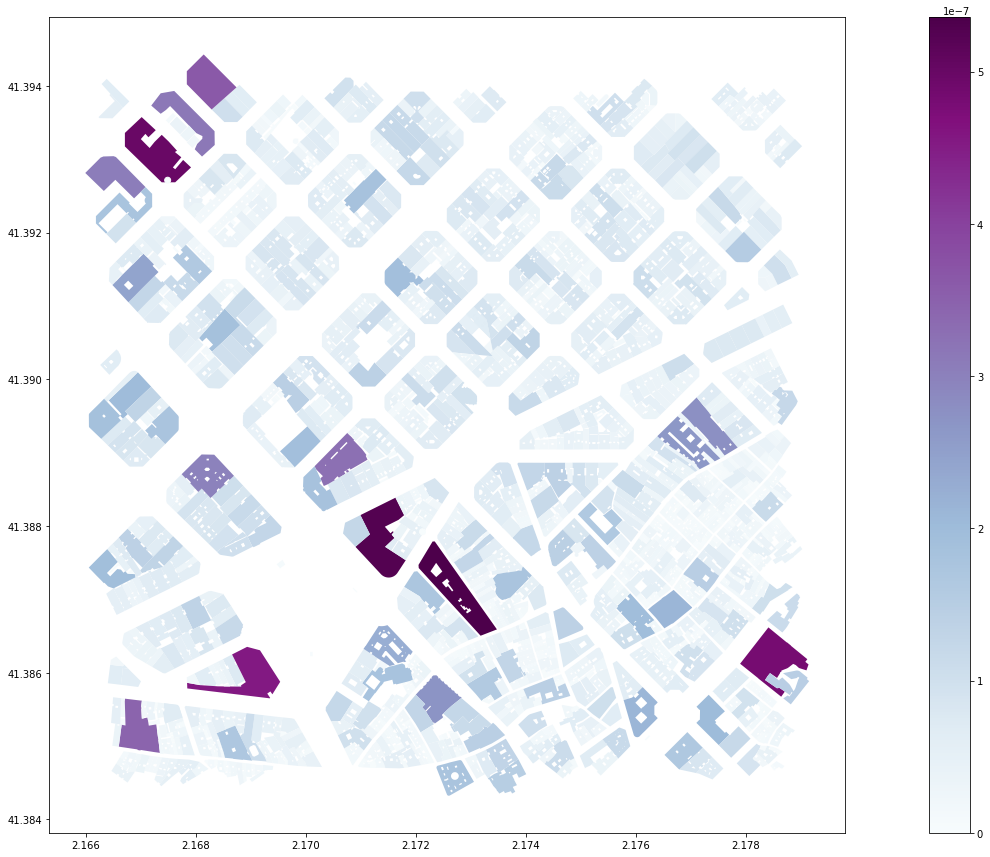

In [ ]:
#matplotlib plotting, color buildings based on area
fig, ax = plt.subplots(figsize = (30,15))

buildings.plot(column='area', ax=ax, 
legend=True,
cmap='BuPu',
)


In [ ]:
# get residential buildings only
tags_r = { 'building': 'apartments'}

In [ ]:
#retrieving buildings from the same location
buildings = ox.geometries_from_point(point, tags_r, dist=500)

<AxesSubplot:>

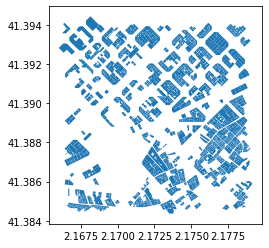

In [ ]:
buildings.plot()

POINTS OF INTEREST

Amenities values list:https://wiki.openstreetmap.org/wiki/Key:amenity

In [ ]:
#creating the tags dictionary
tags = {'amenity' : 'cafe' }

In [ ]:
#retrieve cafes
cafe = ox.geometries_from_point(point, tags, dist=500)

In [ ]:
#length
len(cafe)

73

In [ ]:
cafe

amenity             name wheelchair  \
element_type osmid                                            
node         704031158     cafe      Cafe Zurich        yes   
             704042058     cafe        Starbucks    limited   
             704051187     cafe        Starbucks        NaN   
             704051527     cafe  Cullera de Boix        NaN   
             984332220     cafe        Starbucks        NaN   
...                         ...              ...        ...   
             9233380571    cafe              365        NaN   
             9238444500    cafe   Bakery & Tapas        NaN   
             9240224982    cafe           Hanami        NaN   
             9240224983    cafe      Tête-à-tête        NaN   
             9241043556    cafe          Vivaria        NaN   

                                         geometry      brand brand:wikidata  \
element_type osmid                                                            
node         704031158   POINT (2.16946 41.38585)        NaN            NaN   
             704042058   POINT (2.17191 41.38883)  Starbucks         Q37158   
             704051187   POINT (2.16792 41.38802)  Starbucks         Q37158   
             704051527   POINT (2.16799 41.38798)        NaN            NaN   
             984332220   POINT (2.16792 41.38581)  Starbucks         Q37158   
...                                           ...        ...            ...   
             9233380571  POINT (2.17845 41.39039)        NaN            NaN   
             9238444500  POINT (2.17551 41.39016)        NaN            NaN   
             9240224982  POINT (2.17727 41.39045)        NaN            NaN   
             9240224983  POINT (2.17738 41.39026)        NaN            NaN   
             9241043556  POINT (2.17577 41.38991)        NaN            NaN   

                        brand:wikipedia      cuisine     official_name  \
element_type osmid                                                       
node         704031158              NaN          NaN               NaN   
             704042058     en:Starbucks  coffee_shop  Starbucks Coffee   
             704051187     en:Starbucks  coffee_shop  Starbucks Coffee   
             704051527              NaN          NaN               NaN   
             984332220     en:Starbucks  coffee_shop  Starbucks Coffee   
...                                 ...          ...               ...   
             9233380571             NaN          NaN               NaN   
             9238444500             NaN          NaN               NaN   
             9240224982             NaN          NaN               NaN   
             9240224983             NaN          NaN               NaN   
             9241043556             NaN          NaN               NaN   

                        takeaway  ... name:es name:en name:ca  \
element_type osmid                ...                           
node         704031158       NaN  ...     NaN     NaN     NaN   
             704042058       yes  ...     NaN     NaN     NaN   
             704051187       yes  ...     NaN     NaN     NaN   
             704051527       NaN  ...     NaN     NaN     NaN   
             984332220       yes  ...     NaN     NaN     NaN   
...                          ...  ...     ...     ...     ...   
             9233380571      NaN  ...     NaN     NaN     NaN   
             9238444500      NaN  ...     NaN     NaN     NaN   
             9240224982      NaN  ...     NaN     NaN     NaN   
             9240224983      NaN  ...     NaN     NaN     NaN   
             9241043556      NaN  ...     NaN     NaN     NaN   

                        opening_hours:signed payment:mastercard payment:visa  \
element_type osmid                                                             
node         704031158                   NaN                NaN          NaN   
             704042058                   NaN                NaN          NaN   
             704051187                   NaN   

In [ ]:
cafe.shape

(73, 34)

In [ ]:
#checking cafe columns
cafe.columns

Index(['amenity', 'name', 'wheelchair', 'geometry', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'cuisine', 'official_name', 'takeaway', 'addr:city',
       'addr:country', 'addr:housenumber', 'addr:postcode', 'addr:street',
       'branch', 'contact:phone', 'internet_access', 'opening_hours',
       'outdoor_seating', 'phone', 'source', 'website', 'leisure', 'name:es',
       'name:en', 'name:ca', 'opening_hours:signed', 'payment:mastercard',
       'payment:visa', 'diet:gluten_free', 'diet:vegan', 'name:de',
       'operator'],
      dtype='object')

In [ ]:
#plotting few columns
cafe[['name', 'amenity','opening_hours', 'phone']]

name amenity  \
element_type osmid                                 
node         704031158       Cafe Zurich    cafe   
             704042058         Starbucks    cafe   
             704051187         Starbucks    cafe   
             704051527   Cullera de Boix    cafe   
             984332220         Starbucks    cafe   
...                                  ...     ...   
             9233380571              365    cafe   
             9238444500   Bakery & Tapas    cafe   
             9240224982           Hanami    cafe   
             9240224983      Tête-à-tête    cafe   
             9241043556          Vivaria    cafe   

                                                opening_hours phone  
element_type osmid                                                   
node         704031158                                    NaN   NaN  
             704042058                                    NaN   NaN  
             704051187   Fr-Sa 07:30-23:00; Su-Th 07:30-22:00   NaN  
             704051527                                    NaN   NaN  
             984332220                                    NaN   NaN  
...                                                       ...   ...  
             9233380571                                   NaN   NaN  
             9238444500                                   NaN   NaN  
             9240224982                                   NaN   NaN  
             9240224983                                   NaN   NaN  
             9241043556                                   NaN   NaN  

[73 rows x 4 columns]

In [ ]:
#adding a buffer around each node, just not that the units are not in meters here, because of the default projection system
range = cafe.buffer(0.0005)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


DATA PLOTTING

<AxesSubplot:>

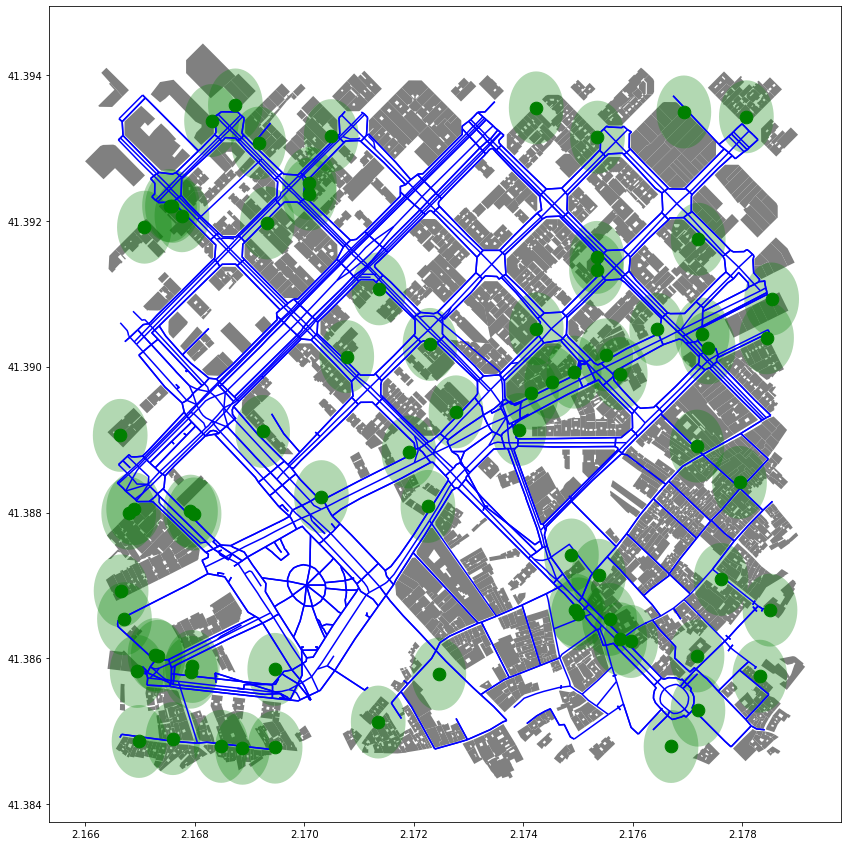

In [ ]:
fig, ax = plt.subplots(figsize = (30,15))

buildings.plot(ax=ax, color='grey')
edges.plot(ax=ax, color='blue')
cafe.plot(ax=ax, markersize=160, color='green', zorder=10)
range.plot(ax=ax, color='green', alpha=0.3)

**We can see here, that the buffer is not in meters and it looks elipsoid too! this is due to the current projection systems where the units are degrees not meters**

In [ ]:
#checking the current projection system
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

https://epsg.io/4326

https://epsg.io/25831


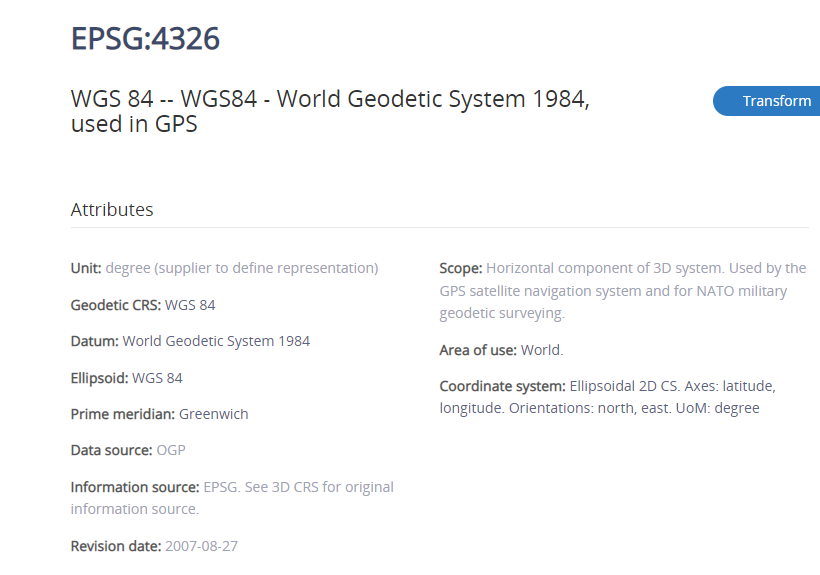


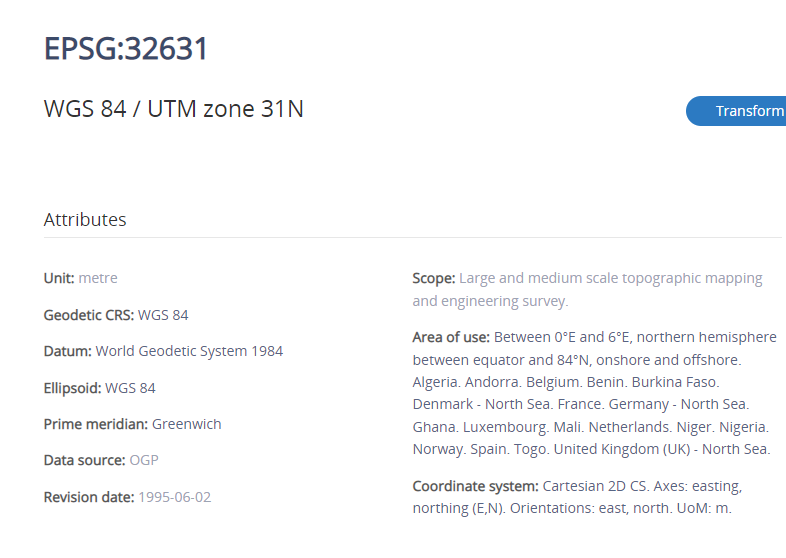

In [ ]:
.to_crs(epsg=321631)

In [ ]:
#changing the current projection system using .to_crs(epsg=32631)
buildings_proj = buildings.to_crs(epsg=32631)
cafe_proj = cafe.to_crs(epsg=32631)
edges_proj = edges.to_crs(epsg=32631)

In [ ]:
buildings_proj.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#create the buffer range on more time, this time it should works with meters
range_proj = cafe_proj.buffer(70)

<AxesSubplot:>

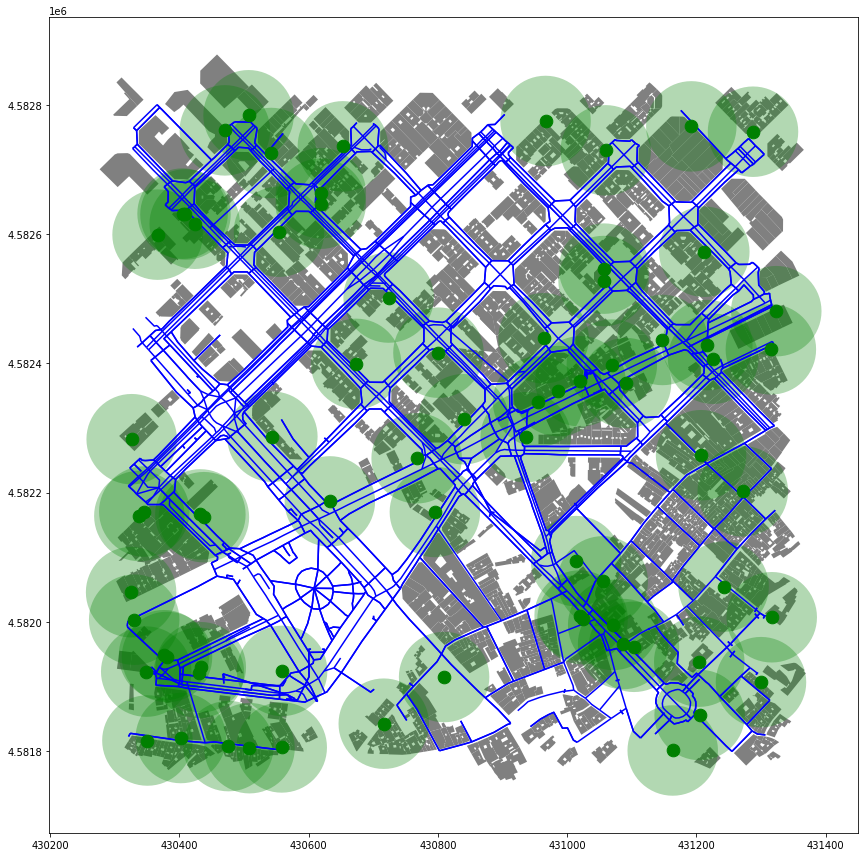

In [ ]:
fig, ax = plt.subplots(figsize = (30,15))

buildings_proj.plot(ax=ax, color='grey')
edges_proj.plot(ax=ax, color='blue')
cafe_proj.plot(ax=ax, markersize=160, color='green', zorder=10)
range_proj.plot(ax=ax, color='green', alpha=0.3)

We can retreive a specific network type

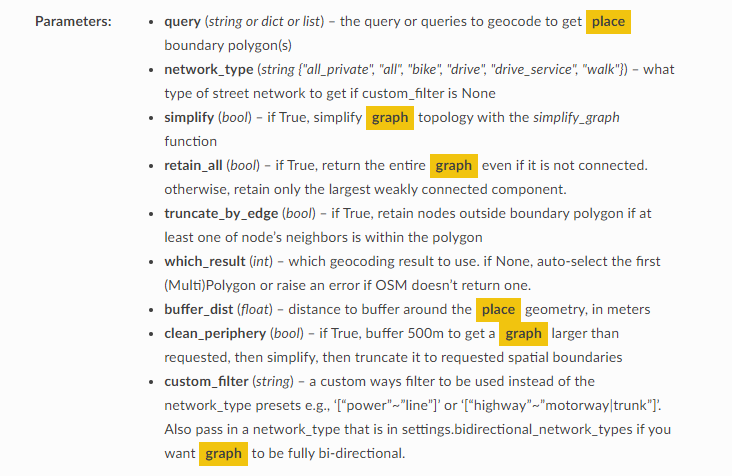

In [ ]:
#retreiving graph from that point in a range of 250 m
bike_graph = ox.graph_from_point(point, dist= 500, network_type= 'bike')

down below is the original network

In [ ]:
edges = ox.graph_to_gdfs(bike_graph, nodes= False, edges=True)

In [ ]:
edges

osmid  \
u          v          key                                                      
26057116   2853451267 0                                             20355312   
           1126640615 0    [931616773, 603022119, 914791432, 905246827, 1...   
26057125   3218700062 0                                            893745919   
26057131   30254228   0                                             20042722   
           5001160871 0                                            519375847   
...                                                                      ...   
9653328891 71643550   0                                             68506265   
9653328892 71643550   0                                           1050464821   
           9653328891 0                                           1050464823   
9656183894 30647460   0                                             20044319   
           5115974082 0                                           1050792359   

                           oneway lanes                 name      highway  \
u          v          key                                                   
26057116   2853451267 0      True     4   Plaça de Catalunya    secondary   
           1126640615 0      True     3   Plaça de Catalunya    secondary   
26057125   3218700062 0     False     3  Rambla de Catalunya  residential   
26057131   30254228   0      True     5   Plaça d'Urquinaona    secondary   
           5001160871 0      True     5   Ronda de Sant Pere    secondary   
...                           ...   ...                  ...          ...   
9653328891 71643550   0      True     4     Carrer de Balmes    secondary   
9653328892 71643550   0      True     3      Carrer de Pelai    secondary   
           9653328891 0      True   NaN      Carrer de Pelai  residential   
9656183894 30647460   0      True   NaN    Carrer d'Ortigosa      service   
           5115974082 0     False   NaN                  NaN      service   

                          maxspeed   length  \
u          v          key                     
26057116   2853451267 0         50   14.315   
           1126640615 0         50  115.733   
26057125   3218700062 0         30   37.585   
26057131   30254228   0         50   51.810   
           5001160871 0         50   31.498   
...                            ...      ...   
9653328891 71643550   0         50   22.671   
9653328892 71643550   0         50   28.712   
           9653328891 0        NaN   14.093   
9656183894 30647460   0         30    3.046   
           5115974082 0        NaN    5.853   

                                                                    geometry  \
u          v          key                                                      
26057116   2853451267 0      LINESTRING (2.17013 41.38575, 2.17024 41.38585)   
           1126640615 0    LINESTRING (2.17013 41.38575, 2.17000 41.38590...   
26057125   3218700062 0    LINESTRING (2.16857 41.38739, 2.16834 41.38750...   
26057131   30254228   0    LINESTRING (2.17235 41.38881, 2.17260 41.38861...   
           5001160871 0    LINESTRING (2.17235 41.38881, 2.17223 41.38876...   
...                                                                      ...   
9653328891 71643550   0    LINESTRING (2.16730 41.38582, 2.16742 41.38574...   
9653328892 71643550   0      LINESTRING (2.16718 41.38573, 2.16752 41.38570)   
           9653328891 0      LINESTRING (2.16718 41.38573, 2.16730 41.38582)   
9656183894 30647460   0      LINESTRING (2.17489 41.38819, 2.17486 41.38817)   
           5115974082 0      LINESTRING (2.17489 41.38819, 2.17484 41.38823)   

                          width  ref        service access tunnel est_width  
u          v          key                                                    
26057116   2853451267 0     NaN  NaN            NaN    NaN    NaN       NaN  
           1126640615 0     NaN  NaN            NaN    NaN    NaN       NaN  
26057125   3218700062 0       7  NaN            NaN    NaN    N

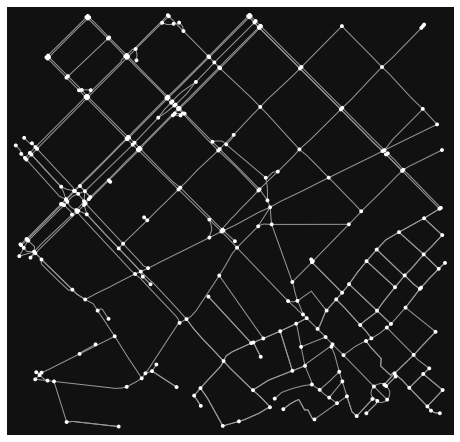

In [ ]:
fig, ax = ox.plot_graph(bike_graph)

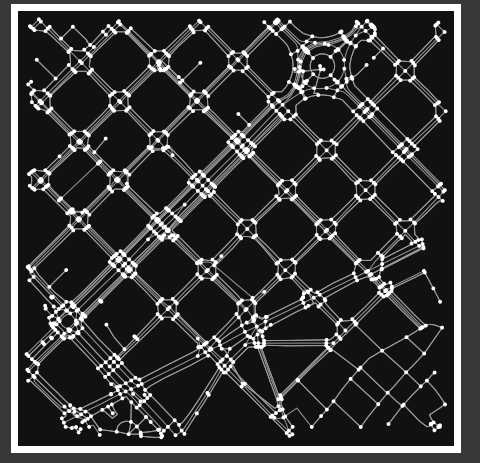